# ATTENTION!!!!
NO 4 SELECTION IN THIS PROJECT!!!!

In [ ]:
# global var set
import transformers

# model info, change as needed
model_checkpoint = "roberta-base"
batch_size = 16
num_epochs = 16

# fileTag = "clean-v1"                      # clean + no phase + combine    (pure clean)
# fileTag = "clean-phase-v1"                # clean +   phase  + combine
# fileTag = 'clean-phase-noCombin-v1'       # clean +   phase  + no combine
# fileTag = 'original-noCheat-noCombin-v1'  # raw   +   no Cheat case
fileTag = 'original'                        # row   +   keep Cheat case     (pure raw) 

fileTag
model_checkpoint

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [12]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [13]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//4], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//4:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//4], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//4:trainDatasetOriginal.shape[0]//2], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//2:]])]), 
                                  'selection2': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//2], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//2:trainDatasetOriginal.shape[0]//4*3], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//4*3:]])]), 
                                  'selection3': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//4*3], 
                                                           trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//4*3:]]),
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//4 else (1 if x < trainDatasetOriginal.shape[0]//2 
                                                                                               else (2 if x < trainDatasetOriginal.shape[0]//4*3 
                                                                                               else 3)) for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'],
                                   'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//4], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//4:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//4], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//4:testDatasetOriginal.shape[0]//2], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//2:]])]), 
                                  'selection2': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//2], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//2:testDatasetOriginal.shape[0]//4*3], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//4*3:]])]), 
                                  'selection3': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//4*3], 
                                                           testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//4*3:]]),
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//4 else (1 if x < testDatasetOriginal.shape[0]//2 
                                                                                               else (2 if x < testDatasetOriginal.shape[0]//4*3 
                                                                                               else 3)) for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)


In [14]:
trainDatasetProcessed.to_csv(f'./dataset/4Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,label
0,"[""afraid""]","[""fear:3"", ""anticipation:2""]",He works hard and has a varying schedule.,Tommy's dad hired a pricy lawyer to defend him.,They reached in and could barely reach her.,Thompson was always afraid of crocodiles.,3
1,"[""excitement"", ""pride"", ""happiness""]","[""joy:3"", ""anticipation:3""]",Esther sat watching TV when the doorbell rang.,"Indeed, after a few months I mastered the iron...",Bill went to the church and stood at the front...,Julie liked to see her dog happy.,1
2,"[""anticipation""]","[""joy:2"", ""surprise:2"", ""anticipation:3""]",We asked everyone else at the party if they wa...,He was given a short deadline.,They called their parents and they helped them...,Thomas is fairly introverted so Maria invited ...,0
3,"[""scared""]","[""fear:3"", ""sadness:2""]","They still had a good time, however, just bein...",Brian got lost between rides.,"When it was over, they ran home to check out t...","They swam to shore, and Kevin's girlfriend cal...",3
4,"[""enjoy""]","[""joy:3"", ""trust:3"", ""anticipation:3""]",He'd spend hours kicking it around his yard.,So he kept adding more and more ingredients.,He always forgot his mom's birthday.,Sophie and her family were soon found by ICE a...,0
...,...,...,...,...,...,...,...
53229,"[""excited""]","[""joy:3"", ""trust:3"", ""anticipation:3""]","Butch grabbed the cat and shook it, and killed...",So she swam across the whole pool and across t...,He bought tickets for opening night.,"One day, she rode it to school.",3
53230,"[""bad""]","[""fear:2"", ""sadness:2"", ""disgust:2"", ""anticipa...",I decided to start a food fight.,He had to leave to puke.,"Eventually, Joe became a strong man, a father ...",By the end of the day she'd bought four differ...,1
53231,"[""sad""]","[""fear:2"", ""surprise:3"", ""sadness:3"", ""anticip...",He saw training footage of the boxing champion...,He then saw his parents putting gifts under th...,Our parents took him to hospital and learned h...,Todd was disgusted with the mess.,2
53232,"[""worried""]","[""fear:3"", ""surprise:3"", ""sadness:2"", ""anticip...",Tom said Jimi Hendrix was the best guitar play...,It was called the juke.,Simon's wife found Simon on the floor in pain.,The Giants had pulled off the biggest upset in...,2


In [15]:
testDatasetProcessed.to_csv(f'./dataset/4Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,label
0,"[""lazy""]","[""disgust:2""]","He is having chicken, potatoes and broccoli.",We spent five relaxing days on pristine beache...,I stepped up to the plate in my first baseball...,Sarah hated to keep her house clean.,3
1,"[""embarrassed ""]","[""fear:3"", ""surprise:2"", ""sadness:2"", ""disgust...",Harris and Angelo were the team leaders for ba...,He spent lots of money buying the latest games.,Bob's dad finally got a riding mower.,He spent the rest of the day on the bunny slopes.,3
2,"[""sillly""]","[""joy:2""]",One day Alex received a ticket for excessive s...,She told me that she sacrificed her studying t...,"Instead of failing them, he had to fail the en...","When he uploaded the video, he titled it The J...",3
3,"[""down and sad""]","[""sadness:3""]","Jo's mom looked pleased, until she found the d...",My son watched Stranger Things on Netflix.,This trip was supposed to be fun but he felt s...,"But she hated the taste, no matter what flavor...",3
4,"[""curious""]","[""joy:3"", ""trust:3"", ""anticipation:3""]",She yelled at me so loud it hurt my ears.,The kids asked Joey how much money his dad made.,She followed the recipe.,She was about to give up and not get the pizza.,1
...,...,...,...,...,...,...,...
51886,"[""alarmed""]","[""surprise:3"", ""anticipation:2""]",She helped John by re-positioning his arm.,The cat was super friendly and nice.,John became so good that he learned other web ...,I went to a Korean barbecue restaurant with so...,0
51887,"[""desire""]","[""joy:2"", ""trust:2"", ""fear:2"", ""surprise:2"", ""...",Every day my mother stayed by his bedside.,Danny wanted to be the greatest magician who e...,She prepared her property and bought the food.,"When the bus made a wide turn, a water bottle ...",1
51888,"[""motivated""]","[""joy:2"", ""trust:3"", ""disgust:2"", ""anger:2"", ""...",Maria continued to practice.,She then got in trouble at work.,She knew the store's bright lights would make ...,"When Tameka's kid turned 18, she filed a libel...",0
51889,"[""excited""]","[""joy:2"", ""anticipation:3""]",One day she went to the mailbox and she found ...,My wife is very excited.,His nephew said that was not possible.,They bought pizza for the kids instead.,3


# load dataset

In [41]:
from datasets import load_dataset, load_metric

In [42]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/4Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/4Select-{fileTag}-test.csv'})

Using custom data configuration default-58503371b4ef80cf


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\JAM_0\.cache\huggingface\datasets\csv\default-58503371b4ef80cf\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [43]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'label'],
        num_rows: 42954
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'label'],
        num_rows: 43195
    })
})

In [44]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['afraid']",
 'plutchik': "{'joy': 0, 'trust': 0, 'fear': 3, 'surprise': 3, 'sadness': 0, 'disgust': 3, 'anger': 3, 'anticipation': 3}",
 'selection0': 'Kate turned around in a huff and finished her assignment.',
 'selection1': 'Mike walked across a police officer parked on the side of the road.',
 'selection2': 'Jeffrey has become one of my best friends!',
 'selection3': 'The baby chickens seemed to be disappearing overnight.',
 'label': 3}

In [62]:
def show_one(example):
    print(f"Context: {example['emotion']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"  C - {example['selection2']}")
    print(f"  D - {example['selection3']}")
    print(f"\nGround truth: option {['A', 'B', 'C', 'D'][example['label']]}")

In [69]:
show_one(dataset["train"][2])

Context: []
  A - She put all the ingredients together and got to work.
  B - My friend told me my face was dirty.
  C - She preferred to talk to boys and skip class.
  D - She loved his witty plays.

Ground truth: option D


# Preprocessing Data

In [49]:
from transformers import AutoTokenizer
    
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [50]:
selectionList = ["selection0", "selection1", "selection2", "selection3"]

def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*4 for context in examples["emotion"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList] for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+4] for i in range(0, len(v), 4)] for k, v in tokenized_examples.items()}

In [51]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 4 [18, 28, 23, 19]


In [52]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(4) ]

['<s>The following sentences contain emotions: embarrassed</s></s>Cindy is very tired.</s>',
 "<s>The following sentences contain emotions: embarrassed</s></s>He uses earplugs and white noise to cope, but it isn't enough.</s>",
 '<s>The following sentences contain emotions: embarrassed</s></s>She knew that she did it wrong because her sister laughed.</s>',
 '<s>The following sentences contain emotions: enthusiastic</s></s>I picked some flowers from the garden by the store.</s>',
 '<s>The following sentences contain emotions: enthusiastic</s></s>Brock loves cars.</s>',
 '<s>The following sentences contain emotions: enthusiastic</s></s>Jim brought his empty bucket back into his house for next week.</s>',
 '<s>The following sentences contain emotions: </s></s>She put all the ingredients together and got to work.</s>',
 '<s>The following sentences contain emotions: </s></s>My friend told me my face was dirty.</s>',
 '<s>The following sentences contain emotions: </s></s>She preferred to tal

In [54]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/43 [00:00<?, ?ba/s]

  0%|          | 0/44 [00:00<?, ?ba/s]

# Fine-tuning the model

In [55]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer

model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultipleChoice: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultipleChoice were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predi

In [56]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    #learning_rate=5e-5, # for bert-base
    learning_rate=5e-7, # for roberta-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
)

In [57]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [58]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [60]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(4)]

['<s>The following sentences contain emotions: annoyed</s></s>They walked into every nearby building, but there were no bathrooms.</s><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: annoyed</s></s>He spent every minute of his free time working on the car.</s><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: annoyed</s></s>Everyone else was full from their meal, but Chris remained hungry.</s><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: annoyed</s></s>Last week he finally asked her out to dinner.</s><pad><pad><pad><pad><pad><pad><pad>']

In [61]:
show_one(dataset["train"][8])

Context: ['annoyed']
  A - They walked into every nearby building, but there were no bathrooms.
  B - He spent every minute of his free time working on the car.
  C - Everyone else was full from their meal, but Chris remained hungry.

Ground truth: option C


# Trainer Defined

In [78]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [79]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [80]:
!nvidia-smi

Fri Jun 17 05:08:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.23       Driver Version: 511.23       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:09:00.0  On |                  N/A |
| 30%   40C    P2    68W / 350W |  13376MiB / 24576MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [81]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 3090
Memory Usage:
Allocated: 0.5 GB
Cached:    7.6 GB


In [82]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.678000,0.591944,0.716912
2,0.549700,0.479495,0.779905
3,0.482700,0.457887,0.789698
4,0.471500,0.438942,0.795995
5,0.460800,0.432413,0.799722
6,0.434800,0.434317,0.801181
7,0.444400,0.429941,0.804213
8,0.433400,0.425862,0.805510
9,0.417800,0.425906,0.806945
10,0.420700,0.425732,0.808265


TrainOutput(global_step=42960, training_loss=0.45674537289298, metrics={'train_runtime': 3240.1255, 'train_samples_per_second': 13.259, 'total_flos': 312197353314264.0, 'epoch': 16.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

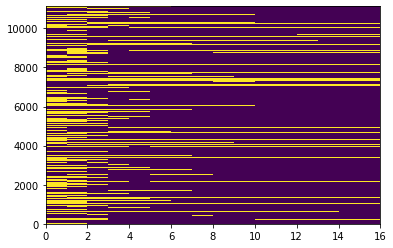

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [57]:
import pandas as pd

dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/[Emotion] 4Select/TI-{model_checkpoint}-{fileTag}.csv')

In [58]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/[Emotion] 4Select/ESI-{model_checkpoint}-{fileTag}.csv')